In [14]:


# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the working directory and read the dataset
file_path = "D:/Stevens/KDD/breast-cancer-wisconsin.csv"

# Read the dataset
newDataSet = pd.read_csv(file_path, sep=',', na_values=['?', 'NA'])

# Display the first 5 rows of the dataset
print(newDataSet.head())



    Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
0  1000025   5   1   1   1   2   1.0   3   1   1      2
1  1002945   5   4   4   5   7  10.0   3   2   1      2
2  1015425   3   1   1   1   2   2.0   3   1   1      2
3  1016277   6   8   8   1   3   4.0   3   7   1      2
4  1017023   4   1   1   3   2   1.0   3   1   1      2


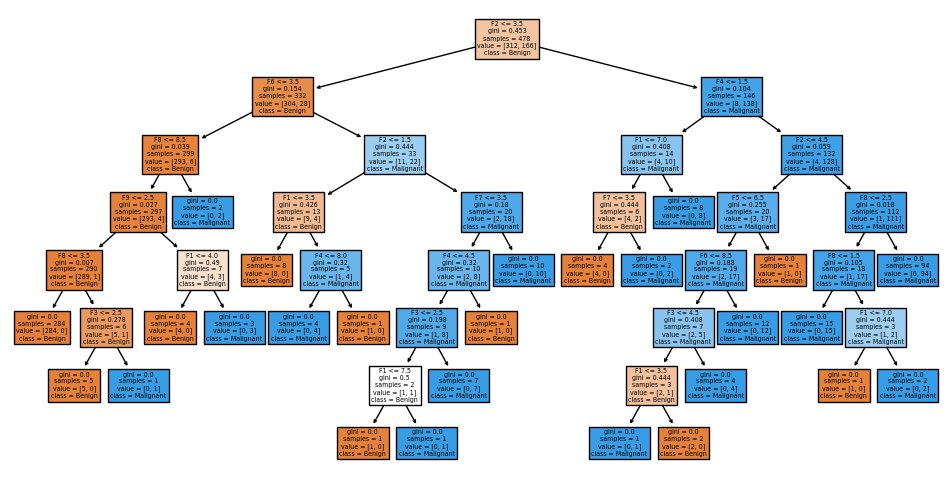

In [15]:
# Handle non-numeric characters in column F6
newDataSet['F6'] = pd.to_numeric(newDataSet['F6'], errors='coerce')

# Check the number of rows before and after removing missing values
original_rows = newDataSet.shape[0]
newDataSet = newDataSet.dropna()
new_rows = newDataSet.shape[0]

# Convert labels to factor class
newDataSet['Class'] = newDataSet['Class'].map({2: 'Benign', 4: 'Malignant'})

# Generate train and test datasets in the ratio 70% to 30%
X = newDataSet.iloc[:, 1:-1]  # Features
y = newDataSet['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Implement CART
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(cart, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.show()

# Predict the class for the test set
predicted_class = cart.predict(X_test)



In [16]:

# Confusion Matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_class)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_class) * 100

# Print the results
print("Number of rows before removing missing values:", original_rows)
print("Number of rows after removing missing values:", new_rows)
print("Number of predicted classes:", len(predicted_class))
print("Number of actual classes:", len(y_test))
print("Confusion Matrix:")
print(confusion_matrix_result)
print("Accuracy: {:.2f}%".format(accuracy))

Number of rows before removing missing values: 699
Number of rows after removing missing values: 683
Number of predicted classes: 205
Number of actual classes: 205
Confusion Matrix:
[[130   2]
 [  4  69]]
Accuracy: 97.07%
